In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
import cv2 as cv

In [2]:
DATA_FOLDER = './dataset'
TRAIN_SAMPLE_FOLDER = 'train_sample_videos'
TEST_FOLDER = 'test_videos'

print(f"Train samples: {len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))}")
print(f"Test samples: {len(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))}")

Train samples: 401
Test samples: 400


In [3]:
FACE_DETECTION_FOLDER = './haarcascades'
print(f"Face detection resources: {os.listdir(FACE_DETECTION_FOLDER)}")

Face detection resources: ['haarcascade_eye.xml', 'haarcascade_frontalface_alt.xml', 'haarcascade_smile.xml', 'haarcascade_frontalface_alt2.xml', 'haarcascade_licence_plate_rus_16stages.xml', 'haarcascade_eye_tree_eyeglasses.xml', 'haarcascade_frontalface_alt_tree.xml', 'haarcascade_frontalcatface_extended.xml', 'haarcascade_lefteye_2splits.xml', 'haarcascade_righteye_2splits.xml', 'haarcascade_lowerbody.xml', 'haarcascade_russian_plate_number.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_fullbody.xml', 'haarcascade_upperbody.xml', 'haarcascade_frontalface_default.xml', 'haarcascade_profileface.xml']


In [4]:
train_list = list(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))
ext_dict = []
for file in train_list:
    file_ext = file.split('.')[1]
    if (file_ext not in ext_dict):
        ext_dict.append(file_ext)
print(f"Extensions: {ext_dict}")      

Extensions: ['mp4', 'json']


In [5]:
for file_ext in ext_dict:
    print(f"Files with extension `{file_ext}`: {len([file for file in train_list if  file.endswith(file_ext)])}")

Files with extension `mp4`: 400
Files with extension `json`: 1


In [6]:
test_list = list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))
ext_dict = []
for file in test_list:
    file_ext = file.split('.')[1]
    if (file_ext not in ext_dict):
        ext_dict.append(file_ext)
print(f"Extensions: {ext_dict}")
for file_ext in ext_dict:
    print(f"Files with extension `{file_ext}`: {len([file for file in train_list if  file.endswith(file_ext)])}")


Extensions: ['mp4']
Files with extension `mp4`: 400


In [7]:
json_file = [file for file in train_list if  file.endswith('json')][0]
print(f"JSON file: {json_file}")

JSON file: metadata.json


In [12]:
def get_meta_from_json(path):
    df = pd.read_json(os.path.join(DATA_FOLDER, path, json_file))
    df = df.T
    return df

meta_train_df = get_meta_from_json(TRAIN_SAMPLE_FOLDER)
meta_train_df.head()

,label,original,split
aagfhgtpmv.mp4,FAKE,vudstovrck.mp4,train
aapnvogymq.mp4,FAKE,jdubbvfswz.mp4,train
abarnvbtwb.mp4,REAL,None,train
abofeumbvv.mp4,FAKE,atvmxvwyns.mp4,train
abqwwspghj.mp4,FAKE,qzimuostzz.mp4,train


In [14]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(meta_train_df)

,label,original,split
Total,0,77,0
Percent,0,19.25,0
Types,object,object,object


In [15]:
# Probablement les datas originelles manquantes sont celles avec le label reel (vu qu'elles sont déjà originales)

missing_data(meta_train_df.loc[meta_train_df.label=='REAL'])

,label,original,split
Total,0,77,0
Percent,0,100,0
Types,object,object,object


Le dataset ne possède point de data manquante

In [16]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

unique_values(meta_train_df)

,label,original,split
Total,400,323,400
Uniques,2,209,1


Toutes les datas sont uniques 

In [19]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes / feature
    param: feature - the feature to analyze
    param: title - title to add to the graph
    param: df - dataframe from which we plot feature's classes distribution 
    param: size - default 1.
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    


most_frequent_values(meta_train_df)

,label,original,split
Total,400,323,400
Most frequent item,FAKE,meawmsgiti.mp4,train
Frequence,323,6,400
Percent from total,80.75,1.858,100


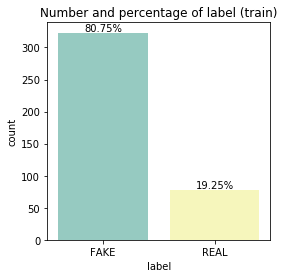

In [21]:
plot_count('label', 'label (train)', meta_train_df)

Unbalanced dataset

In [22]:
meta = np.array(list(meta_train_df.index))
storage = np.array([file for file in train_list if  file.endswith('mp4')])
print(f"Metadata: {meta.shape[0]}, Folder: {storage.shape[0]}")
print(f"Files in metadata and not in folder: {np.setdiff1d(meta,storage,assume_unique=False).shape[0]}")
print(f"Files in folder and not in metadata: {np.setdiff1d(storage,meta,assume_unique=False).shape[0]}")

Metadata: 400, Folder: 400
Files in metadata and not in folder: 0
Files in folder and not in metadata: 0


In [23]:
fake_train_sample_video = list(meta_train_df.loc[meta_train_df.label=='FAKE'].sample(3).index)
fake_train_sample_video

['cyclgfjdrv.mp4', 'acxwigylke.mp4', 'akzbnazxtz.mp4']

In [24]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    ax.imshow(frame)

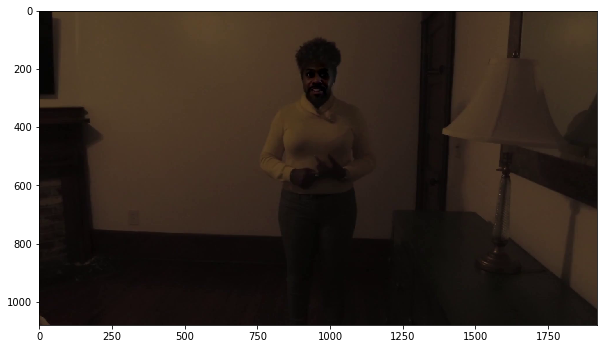

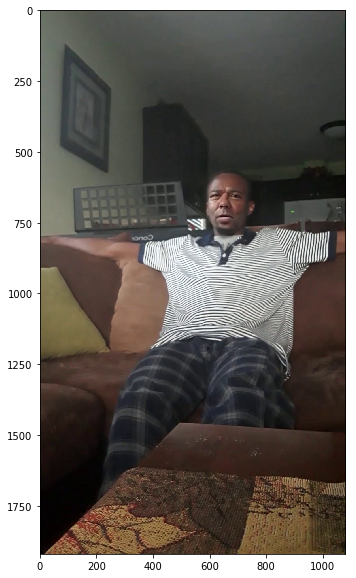

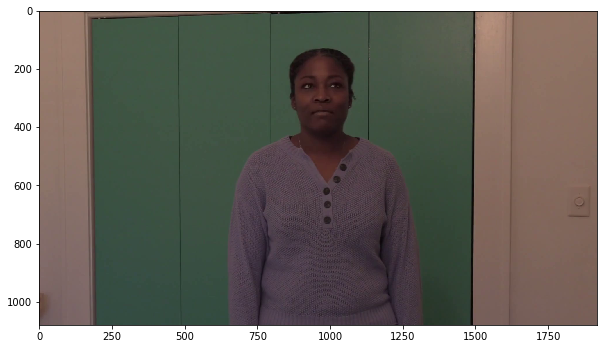

In [25]:
for video_file in fake_train_sample_video:
    display_image_from_video(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

In [26]:
real_train_sample_video = list(meta_train_df.loc[meta_train_df.label=='REAL'].sample(3).index)
real_train_sample_video

['bzythlfnhq.mp4', 'bilnggbxgu.mp4', 'chviwxsfhg.mp4']

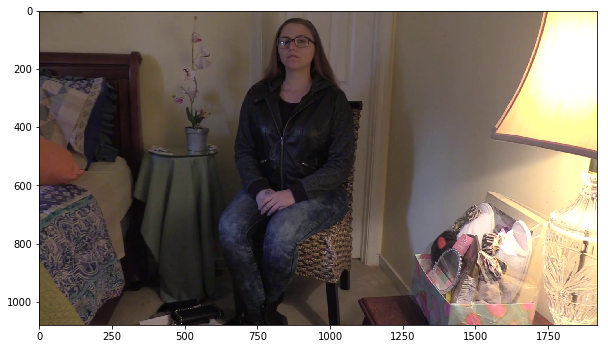

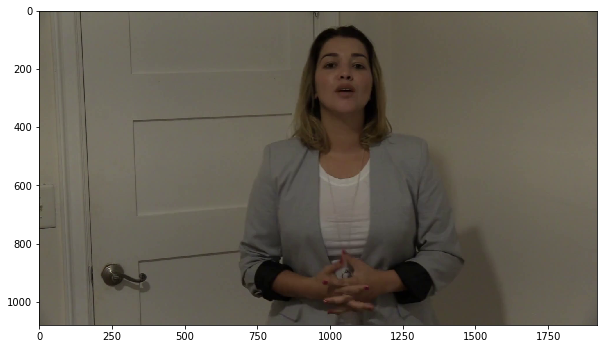

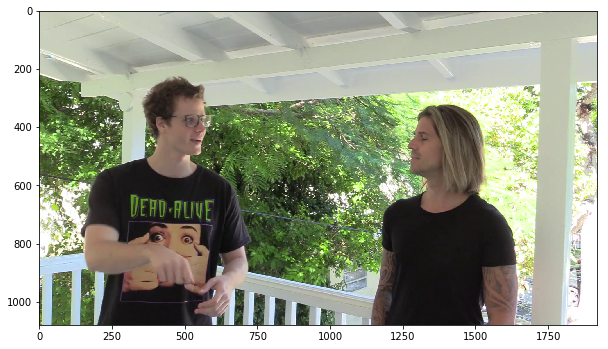

In [27]:
for video_file in real_train_sample_video:
    display_image_from_video(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))